# Minu esimese taseme pealkiri

## Minu teise taseme pealkiri

Tavaline tekst

   year  population  women_population  men_population
0  2024     1371986            719653          652333
1  2023     1370286            719434          650852
2  2022     1348840            708704          640136
3  2021     1330932            699762          631170
4  2020     1329522            699591          629931


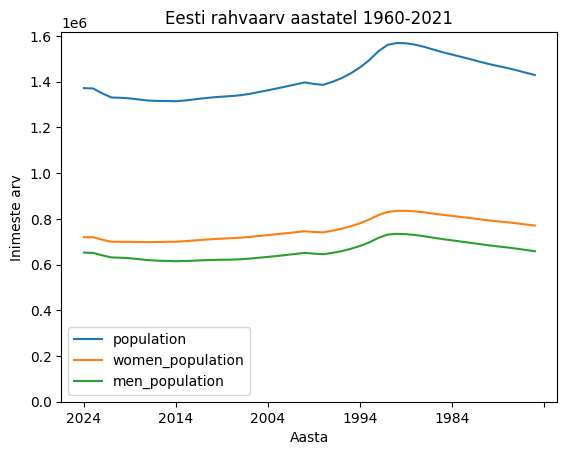

In [1]:
#üaigalda pip install tools.api_request

# paigalda pip install tools.api_request

import requests
import pandas as pd
import matplotlib.pyplot as plt

# url = "https://demo-datahub.rik.ee/api/v1/meta/classifications"

url_riik = 'https://api.worldbank.org/v2/countries/EST/?format=json'
url_rahvastik_ = 'https://api.worldbank.org/v2/country/EST/indicator/SP.POP.TOTL?format=json'
url_women = "https://api.worldbank.org/v2/country/EST/indicator/SP.POP.TOTL.FE.IN?format=json"

response = requests.get(url_rahvastik_)
data = response.json()

response_woman = requests.get(url_women)
data_woman = response_woman.json()


# json dumps muudab väljundi terminalis loetavaks
# print(json.dumps(data, indent=2, ensure_ascii=False))

values = {'year': [], 'population': [], "women_population": []}

# {"year": ["2021", "2020", "2019", ...], "population": [1331057, 1326535, 1324820, ...]}

for item in data[1]:
    values['year'].append(item['date'])
    values['population'].append(item['value'])

for women in data_woman[1]:
    values['women_population'].append(women['value'])

# print(json.dumps(values, indent=2, ensure_ascii=False))

df = pd.DataFrame(values)

df['men_population'] = df['population'] - df['women_population']


# väljastan esimesed read
print(df.head())

# joonistamise osa
df.plot(x='year', y=['population', 'women_population', 'men_population'], kind='line',
        title='Eesti rahvaarv aastatel 1960-2021', xlabel='Aasta', ylabel='Inimeste arv')
plt.ylim(bottom=0)  # y telg algab nullist
plt.xlim()  # x telg lõpeb 2021


plt.savefig('rik_rahvastik.png')
plt.show()



# print(df)

# response_df = pd.json_normalize(data)
# print(response_df)
   

# müüginäitajad

-teeme mõned group by, kasutades dataframe (pie)



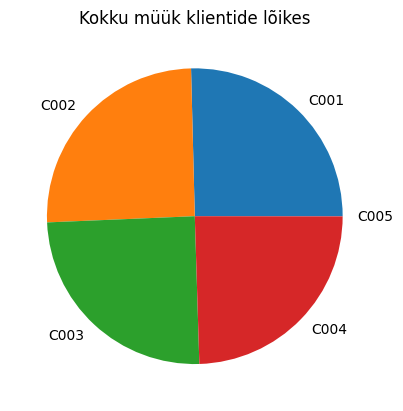

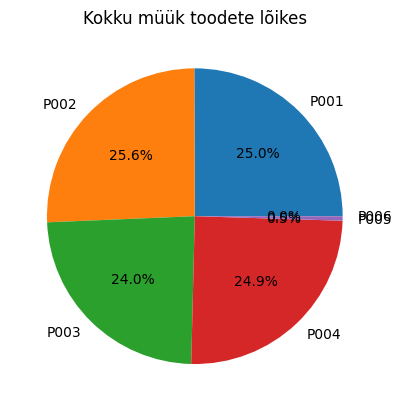

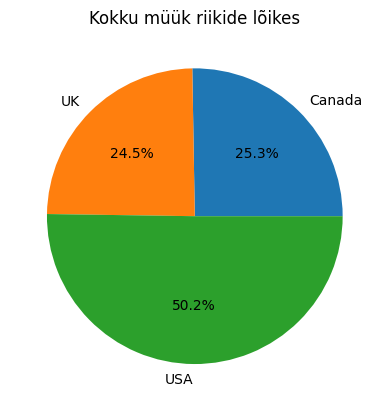

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

sale_dat_url = r'C:\Users\opilane\Documents\andmetarkus-1\python\ANALYSIS\SalesTable (1).csv'
customer_data_url = r'C:\Users\opilane\Documents\andmetarkus-1\python\ANALYSIS\CustomerTable.csv'
product_data_url = r'C:\Users\opilane\Documents\andmetarkus-1\python\ANALYSIS\ProductTable.csv'

sales_data = pd.read_csv(sale_dat_url)
customer_data = pd.read_csv(customer_data_url)

merged_data = pd.merge(sales_data, customer_data, on='CustomerID', how='left')
merged_data['Amount'] = merged_data['Quantity'] * merged_data['UnitPrice'] * (1- merged_data['Discount'])
 

grouped_by_customerID = merged_data.groupby('CustomerID').sum(numeric_only=True)
grouped_by_customerID.plot(y='Amount', kind='pie', title='Kokku müük klientide lõikes', ylabel='', legend=False)    
plt.show()

grouped_by_productID = merged_data.groupby('ProductID').sum(numeric_only=True)
grouped_by_productID.plot(y='Amount', kind='pie', title='Kokku müük toodete lõikes', ylabel='', legend=False, autopct='%1.1f%%')

plt.show()

grouped_by_country = merged_data.groupby('Country').sum(numeric_only=True)
grouped_by_country.plot(y='Amount', kind='pie', title='Kokku müük riikide lõikes', ylabel='', legend=False, autopct='%1.1f%%')
plt.show()




# print(grouped_by_country.head())
